In [321]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
employment_2019 = pd.read_csv('dataset/Punesimi-2019.csv')
employment_2020 = pd.read_csv('dataset/Punesimi-2020.csv')
employment_2021 = pd.read_csv('dataset/Punesimi-2021.csv')
employment_2022 = pd.read_csv('dataset/Punesimi-2022.csv')
employment_2023 = pd.read_csv('dataset/Punesimi-2023.csv')


In [322]:
# Combine the datasets
employment_combined = pd.concat([employment_2019, employment_2020, employment_2021, employment_2022, employment_2023], ignore_index=True)
employment_combined.drop('Unnamed: 3', axis=1, inplace=True)

In [323]:
employment_combined.info()
employment_combined.dtypes
employment_combined.describe(include='all')
employment_combined.count()

# export the combined dataset
employment_combined.to_csv('dataset/employment.csv', index=False)

employment_combined.head(5)
employment_combined.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88014 entries, 0 to 88013
Data columns (total 27 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Viti Godina Year                                                 88014 non-null  int64  
 1   Muaji 
Mesec
Month                                               88014 non-null  int64  
 2   PERSHKRIMI I SEKTORIT
OPIS SEKTORA
SECTOR DESCRIPTION            88014 non-null  object 
 3   Statusi i regjistrimit 
Status registracije Registration status  88014 non-null  object 
 4   Komuna Opstina Municipality                                      88014 non-null  object 
 5   Nr Tatimp 
Poreski obveznik 
Number of Taxpayers                 88014 non-null  int64  
 6   Nr Puns
Broj zaposlenih 
Number of  employees                    88014 non-null  int64  
 7   Primar Primarna Primary                 

Viti Godina Year                                                        0
Muaji \nMesec\nMonth                                                    0
PERSHKRIMI I SEKTORIT\nOPIS SEKTORA\nSECTOR DESCRIPTION                 0
Statusi i regjistrimit \nStatus registracije Registration status        0
Komuna Opstina Municipality                                             0
Nr Tatimp \nPoreski obveznik \nNumber of Taxpayers                      0
Nr Puns\nBroj zaposlenih \nNumber of  employees                         0
Primar Primarna Primary                                                 0
Sekondar Sekundarna Secondary                                           0
Meshkuj\nMuskarci \nMen (M).                                            0
Femra\nZenske\nWomen (F)                                                0
Pa Verif \nNeprovereno \nUnverified                                     0
M 15-24                                                                 0
F 15-24                               

In [324]:
# Translate column names to English
employment_combined['M(15-65+)'] = employment_combined[['M 15-24', 'M 25-34', 'M 35-44', 'M 45-54', 'M 55-64', 'M 65+']].sum(axis=1)
employment_combined['F(15-65+)'] = employment_combined[['F 15-24', 'F 25-34', 'F 35-44', 'F 45-54', 'F 55-64', 'F 65+']].sum(axis=1)
employment_combined['M+F']=employment_combined['M(15-65+)'] + employment_combined['F(15-65+)']
employment_combined['MonthYearISO'] =  employment_combined['Muaji \nMesec\nMonth'].astype(str) + '-' +employment_combined['Viti Godina Year'].astype(str).str.pad(width=2, fillchar='0')

print(employment_combined.head())

column_translations = {
    'Viti Godina Year': 'Year',
    'Muaji \nMesec\nMonth': 'Month',
    'MonthYearISO': 'Month-Year',
    'PERSHKRIMI I SEKTORIT\nOPIS SEKTORA\nSECTOR DESCRIPTION': 'Sector Description',
    'Statusi i regjistrimit \nStatus registracije Registration status': 'Registration Status',
    'Komuna Opstina Municipality': 'Municipality',
    'M+F': 'Number of Employees',
    'M(15-65+)': 'Men',
    'F(15-65+)': 'Women',
    'Mesat. Meshk \nProsecni M.\nAverage M.': 'Average Wage Men',
    'Mesat. Fem.\nProsecni F. Average F.': 'Average Wage Women'
}
employment_translated = employment_combined.rename(columns=column_translations).loc[:, list(column_translations.values())]

employment_translated.head(5)

   Viti Godina Year  Muaji \nMesec\nMonth  \
0              2019                     1   
1              2019                     1   
2              2019                     1   
3              2019                     1   
4              2019                     1   

  PERSHKRIMI I SEKTORIT\nOPIS SEKTORA\nSECTOR DESCRIPTION  \
0                                       Ndertimtaria        
1                                       Ndertimtaria        
2                                  Mungon aktiviteti        
3                                Industria nxjerrese        
4                               Industria perpunuese        

  Statusi i regjistrimit \nStatus registracije Registration status  \
0                                            SH.P.K.                 
1                                         Individual                 
2                                         Individual                 
3                                            SH.P.K.                 
4           

,Year,Month,Month-Year,Sector Description,Registration Status,Municipality,Number of Employees,Men,Women,Average Wage Men,Average Wage Women
0,2019,1,1-2019,Ndertimtaria,SH.P.K.,PRISHTINË,3449,2803,646,424.33,357.40
1,2019,1,1-2019,Ndertimtaria,Individual,SKENDERAJ,117,103,14,274.26,242.53
2,2019,1,1-2019,Mungon aktiviteti,Individual,VITI,1,0,1,NaN,170.00
3,2019,1,1-2019,Industria nxjerrese,SH.P.K.,PODUJEVË,8,8,0,177.50,NaN
4,2019,1,1-2019,Industria perpunuese,Individual,SHTIME,83,67,16,234.57,210.61


In [325]:
employment_combined.info()
employment_combined.dtypes
employment_combined.describe(include='all')
employment_combined.count()

# export the combined dataset
employment_combined.to_csv('dataset/employment.csv', index=False)

employment_combined.head(5)
employment_combined.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88014 entries, 0 to 88013
Data columns (total 31 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Viti Godina Year                                                 88014 non-null  int64  
 1   Muaji 
Mesec
Month                                               88014 non-null  int64  
 2   PERSHKRIMI I SEKTORIT
OPIS SEKTORA
SECTOR DESCRIPTION            88014 non-null  object 
 3   Statusi i regjistrimit 
Status registracije Registration status  88014 non-null  object 
 4   Komuna Opstina Municipality                                      88014 non-null  object 
 5   Nr Tatimp 
Poreski obveznik 
Number of Taxpayers                 88014 non-null  int64  
 6   Nr Puns
Broj zaposlenih 
Number of  employees                    88014 non-null  int64  
 7   Primar Primarna Primary                 

Viti Godina Year                                                        0
Muaji \nMesec\nMonth                                                    0
PERSHKRIMI I SEKTORIT\nOPIS SEKTORA\nSECTOR DESCRIPTION                 0
Statusi i regjistrimit \nStatus registracije Registration status        0
Komuna Opstina Municipality                                             0
Nr Tatimp \nPoreski obveznik \nNumber of Taxpayers                      0
Nr Puns\nBroj zaposlenih \nNumber of  employees                         0
Primar Primarna Primary                                                 0
Sekondar Sekundarna Secondary                                           0
Meshkuj\nMuskarci \nMen (M).                                            0
Femra\nZenske\nWomen (F)                                                0
Pa Verif \nNeprovereno \nUnverified                                     0
M 15-24                                                                 0
F 15-24                               

In [326]:
# Correcting specific characters in the dataframe
employment_translated['Sector Description'] = employment_translated['Sector Description'].str.replace('Ã‹', 'Ë').replace('Ã‡', 'Ç')
employment_translated['Registration Status'] = employment_translated['Registration Status'].str.replace('Ã‹', 'Ë').replace('Ã‡', 'Ç')

employment_translated = employment_translated.dropna(subset=['Average Wage Men', 'Average Wage Women'], how='any')

employment_translated.loc[(employment_translated['Men'] == 0) & (employment_translated['Average Wage Men'].isna()), 'Average Wage Men'] = 0

# Identify rows to drop
rows_to_drop_man = employment_translated[(employment_translated['Men'] != 0) & (employment_translated['Average Wage Men'].isna())].index

# Drop rows
employment_translated = employment_translated.drop(rows_to_drop_man)

employment_translated.loc[(employment_translated['Women'] == 0) & (employment_translated['Average Wage Women'].isna()), 'Average Wage Women'] = 0

# Identify rows to drop
rows_to_drop_woman = employment_translated[(employment_translated['Women'] != 0) & (employment_translated['Average Wage Women'].isna())].index

# Drop rows
employment_translated = employment_translated.drop(rows_to_drop_woman)


In [327]:
employment_translated.shape
# employment_translated.head(5)

(70611, 11)

In [328]:
# number of unique values in the 'Sector Description' column
employment_translated['Sector Description'].nunique()

22

In [329]:
# number of unique values in the 'Registration Status' column
employment_translated['Registration Status'].nunique()

30

In [330]:
label_encoder = LabelEncoder()

employment_translated.loc[:, 'Sector Id'] = label_encoder.fit_transform(employment_translated['Sector Description'])
employment_translated.loc[:, 'Registration Id'] = label_encoder.fit_transform(employment_translated['Registration Status'])

In [331]:
employment_translated.shape
employment_translated.head(5)


,Year,Month,Month-Year,Sector Description,Registration Status,Municipality,Number of Employees,Men,Women,Average Wage Men,Average Wage Women,Sector Id,Registration Id
0,2019,1,1-2019,Ndertimtaria,SH.P.K.,PRISHTINË,3449,2803,646,424.33,357.40,17,23
1,2019,1,1-2019,Ndertimtaria,Individual,SKENDERAJ,117,103,14,274.26,242.53,17,8
4,2019,1,1-2019,Industria perpunuese,Individual,SHTIME,83,67,16,234.57,210.61,14,8
5,2019,1,1-2019,Industria perpunuese,SH.P.K.,FERIZAJ,1689,1372,317,311.01,241.34,14,23
6,2019,1,1-2019,Informimi dhe komunikimi,SH.P.K.,SKENDERAJ,14,10,4,345.83,207.65,15,23


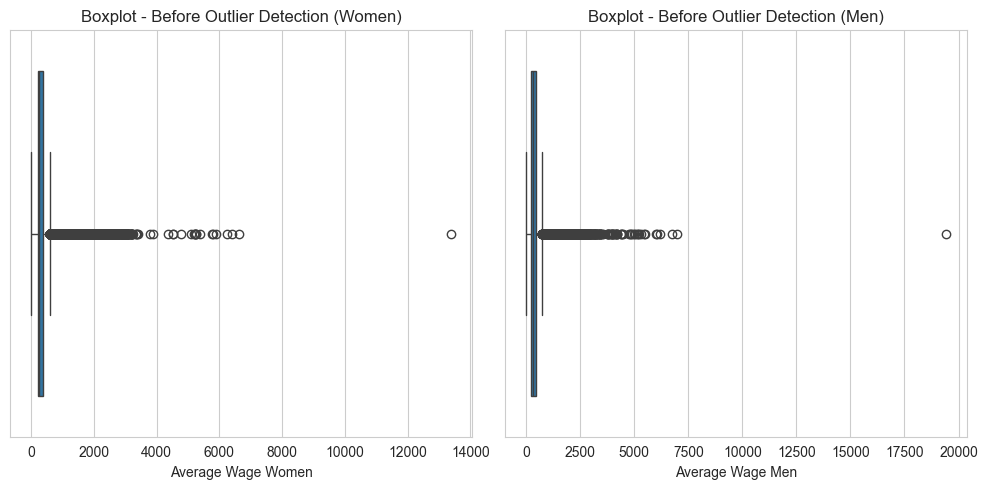

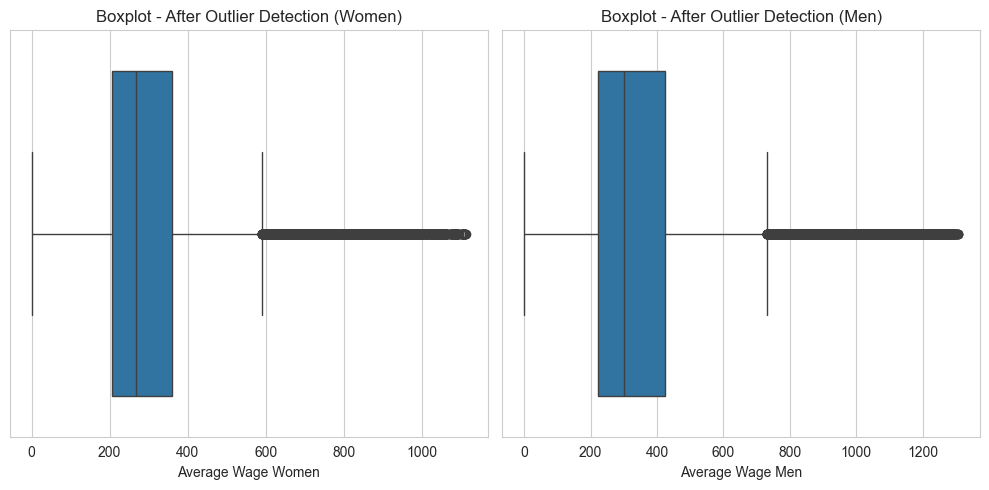

In [333]:
# Before outlier detection
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(data=employment_translated, x='Average Wage Women', ax=ax1)
ax1.set_title('Boxplot - Before Outlier Detection (Women)')

sns.boxplot(data=employment_translated, x='Average Wage Men', ax=ax2)
ax2.set_title('Boxplot - Before Outlier Detection (Men)')

plt.tight_layout()
plt.show()

# Calculate the z-scores for "Average Wage Women" and "Average Wage Men" columns
z_scores = (employment_translated[['Average Wage Women', 'Average Wage Men']] - employment_translated[['Average Wage Women', 'Average Wage Men']].mean()) / employment_translated[['Average Wage Women', 'Average Wage Men']].std()

# Define a threshold for outlier detection (e.g., z-score > 3 or z-score < -3)
threshold = 3

# Identify the outliers by checking if the absolute z-score exceeds the threshold
outliers = z_scores.abs() > threshold

# Filter the DataFrame to include only the rows without outliers
employment_translated_no_outliers = employment_translated[~outliers.any(axis=1)]

# After outlier detection
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(data=employment_translated_no_outliers, x='Average Wage Women', ax=ax1)
ax1.set_title('Boxplot - After Outlier Detection (Women)')

sns.boxplot(data=employment_translated_no_outliers, x='Average Wage Men', ax=ax2)
ax2.set_title('Boxplot - After Outlier Detection (Men)')

plt.tight_layout()
plt.show()



In [334]:
employment_translated_no_outliers.shape

(68845, 13)

In [335]:
# employment_translated show how many false and true values
employment_translated_no_outliers['FemaleWageGreaterThanMale'].value_counts()

# create a csv file with the current data
employment_translated_no_outliers.to_csv('employment.csv', index=False)

KeyError: 'FemaleWageGreaterThanMale'

In [ ]:
# Create a new column based on the condition

X = employment_translated_no_outliers.drop(['FemaleWageGreaterThanMale'], axis=1)  # Drop non-feature columns
y = employment_translated_no_outliers['FemaleWageGreaterThanMale']

# Splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Filtering numeric columns only for SMOTE
X_train_numeric = X_train.select_dtypes(include='number')


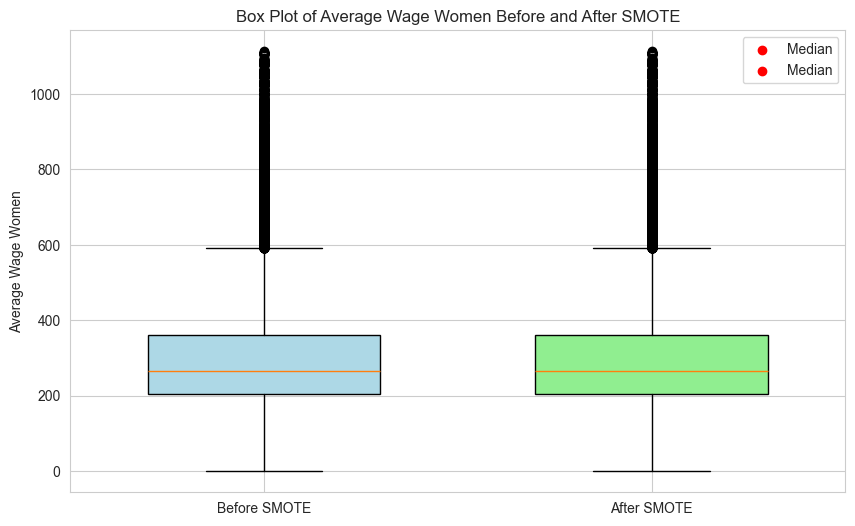

In [ ]:

# Continue with further preprocessing...
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create a box plot for the 'Average Wage Women' column before SMOTE
ax.boxplot(X_train['Average Wage Women'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightblue'))
ax.scatter(1, X_train['Average Wage Women'].median(), color='red', marker='o', label='Median')

# Create a box plot for the 'Average Wage Women' column after SMOTE
ax.boxplot(X_train['Average Wage Women'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
ax.scatter(2, X_train['Average Wage Women'].median(), color='red', marker='o', label='Median')

# Set the labels and title
ax.set_xticklabels(['Before SMOTE', 'After SMOTE'])
ax.set_ylabel('Average Wage Women')
ax.set_title('Box Plot of Average Wage Women Before and After SMOTE')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
skewness_men = employment_translated_no_outliers['Average Wage Men'].skew()
skewness_women = employment_translated_no_outliers['Average Wage Women'].skew()

print("Skewness for 'Average Wage Men':", skewness_men)
print("Skewness for 'Average Wage Women':", skewness_women)

Skewness for 'Average Wage Men': 1.7835169666618993
Skewness for 'Average Wage Women': 1.8746282604811406


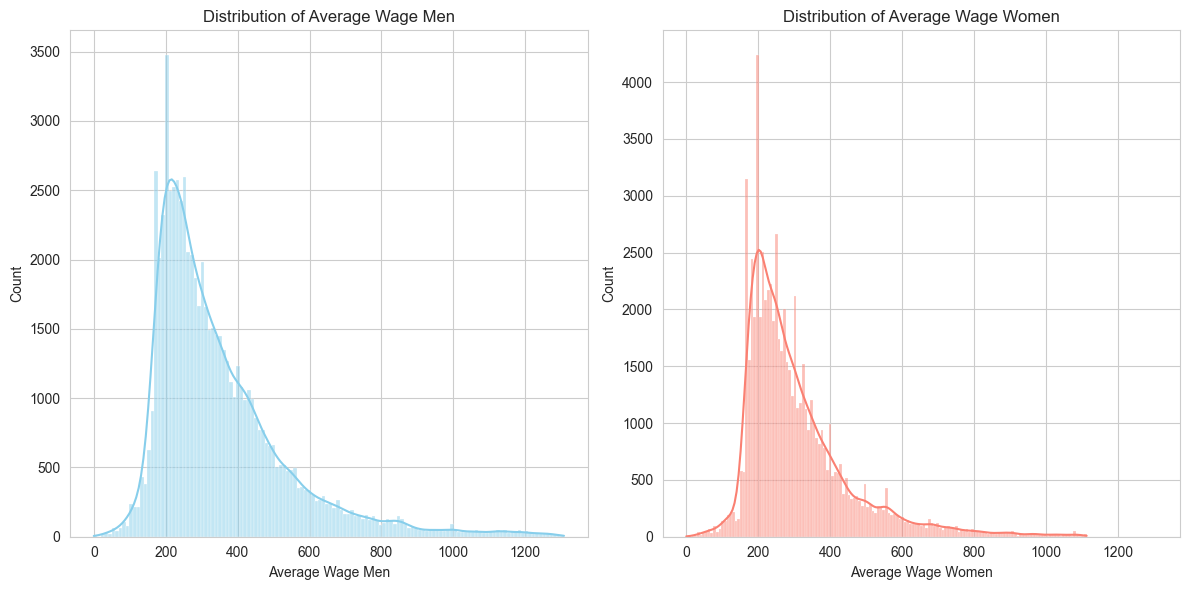

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

# Plot a histogram and kernel density estimate for 'Average Wage Men'
sns.histplot(employment_translated_no_outliers['Average Wage Men'], color="skyblue", ax=axes[0], kde=True)
axes[0].set_title('Distribution of Average Wage Men')

# Plot a histogram and kernel density estimate for 'Average Wage Women'
sns.histplot(employment_translated_no_outliers['Average Wage Women'], color="salmon", ax=axes[1], kde=True)
axes[1].set_title('Distribution of Average Wage Women')

# Display the plots
plt.tight_layout()
plt.show()